# Histogramas

En esta sección vamos a conocer los histogramas, y ver como pueden servirnos de cara a la mejora de contraste de una imagen, así como una primera clasificación de objetos dentro de una imagen.

Pero primero, ¿que es un histograma?, es una representación gráfica de la distribución de los distintos tonos de una imagen. Puede ayudarnos para controlar la exposición en nuestras fotos, así como para corregir los colores.

### cv2.calcHist(images, channels, mask, histSize, ranges)
* images : imagen fuente en formato uint8 o float32. Se debe definir entre corchetes, ie, “[img]”.
* channels :Se define también entre corchetes. Es el indice del canal sobre cual calcularemos el histograma. Por ejemplo, si la entrada es una imagen en escala de grises, el valor será [0]. Para una imagen a color, puedes definir [0], [1] o [2] para calcular el histograma de azul ( R ), verde ( G ), o rojo ( R ) respectivamente.
* mask : Imagen máscara. Si pretendes realizar el histograma de toda una imagen, debes setear el valor a ‘None’. Pero si tu quieres realizar el histograma de una región en particular, deberás definir esa región a traves de esta imagen mascara.
* histSize : representar nuestro contador BIN. Se define entre corchetes []. La escala masiva que se le puede pasar es [256].
* ranges : Este es nuevo rango. Normalmente está situado entre 0 y 256.

En este histograma, podemos analizar como los elementos más blancos, los situados a la derecha del histograma, identificando más al pato y a la nubes. Y por otro lado tendría la parte más cercana al 0, que sería la izquierda de la gráfica, que vendría a identificar a los pixeles con un color más cercanos al negro puro.

**Ejercicio:** Intenta identificar en una imagen en escala de grises (elegida a tu eleccion), los diferentes objetos que aparecen en la imagen a raiz del histograma.


In [ ]:
#tip_01_01.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dataset/examples/Holy-Grail.jpg")
cv2.imshow("dataset/examples/Holy-Grail.jpg", img)
cv2.waitKey(0)
color = ('b', 'g', 'r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c)
    plt.xlim([0, 256])

plt.show()

cv2.destroyAllWindows()


# Ecualización

Es una transformación que pretende obtener para una imagen un histograma con una distribución uniforme. Es decir, que exista el mismo número de pixels para cada nivel de gris del histograma de una imagen monocroma.

### cv2.equalizeHist(src[, dst]) 
* src: imagen a procesar, debe estar en escala de grises.

Nos devuelve la imagen ecualizada a través de su histograma.

**Ejercicio:** prueba a usar diferentes imágenes con diferentes condiciones de luz, ecualizarlas y comprobar los resultados obtenidos.


In [ ]:
#tip_01_02_a.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dataset/examples/life-of-brian2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('Always look on the bright side of life', img)
cv2.waitKey(0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()


**Bibliografía**

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html


# Ecualización adaptativa

Hay veces que cuando la imagen dispone de una amplia gama de colores (escala de grises), no obtenemos grandes mejoras en el contraste. Esto es debido a que se usa un valor fijo de contraste en la ecualización.

Para mejorar este apartado disponemos de funciones de ecualización de histograma adaptativo. Para ello, la imagen se divide en pequeños bloques llamados “tiles” (tileSize es 8×8 por defecto en OpenCV). Cada uno de estos bloques se ecualiza de manera independiente. Lo que supone un histograma de pequeñas zonas de la imagen, teniendo un contraste más adaptado, y no tan general como en el caso anterior, que para imágenes con muchos matices, donde tenderán a perderse la definición de los detalles.

In [ ]:
#tip_01_02_b.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# Ecualizacion de histogramas
img = cv2.imread("dataset/examples/life-of-brian2.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

cv2.imshow('Histogramas', img)
cv2.waitKey(0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

In [ ]:
#tip_01_02_c.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# Ecualizacion de histograma adaptativo

img = cv2.imread("dataset/examples/life-of-brian2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('Always look on the bright side of life', img)
cv2.waitKey(0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img = clahe.apply(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')
cv2.imshow('Always look on the bright side of life', img)
cv2.waitKey(0)

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()


In [ ]:
#tip_01_02_d.py
import cv2

# Ecualizacion de histograma adaptativo

img = cv2.imread("dataset/examples/life-of-brian2.jpg", 1)
cv2.imshow("Always look on the bright side of life", img)
cv2.waitKey(0)
# -----Converting image to LAB Color model-----------------------------------
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab", lab)
cv2.waitKey(0)
# -----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.waitKey(0)
cv2.imshow('a_channel', a)
cv2.waitKey(0)
cv2.imshow('b_channel', b)
cv2.waitKey(0)

# -----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)
cv2.waitKey(0)
# -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl, a, b))
cv2.imshow('limg', limg)
cv2.waitKey(0)
# -----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)
cv2.waitKey(0)

cv2.destroyAllWindows()

**Bibliografía**

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html

# Operadores morfológicos

La Morfología matemática ha demostrado ser una herramienta importante en el análisis de imágenes cuando la topología y la estructura geométrica de los objetos presentes en ellas son los parámetros claves para su caracterización. 

Es una técnica de procesamiento y análisis de imágenes relativamente joven que ha demostrado gran capacidad para solventar una amplia gama de problemas sobre imágenes binarias (en blanco y negro) o numéricas (en escala de grises o a color). 

* Las operaciones morfológicas simplifican imágenes y conservan las principales características de forma de los objetos. 
* Un sistema de operadores de este tipo y su composición, permite que las formas subyacentes sean identificadas y reconstruidas de forma Morfología óptima a partir de sus formas distorsionadas y ruidosas. 
* La morfología matemática se puede usar, entre otros, con los siguientes objetivos: 
    * Pre-procesamiento de imágenes (supresión de ruidos, simplificación de formas). 
    * Destacar la estructura de los objetos (extraer el esqueleto, detección de objetos, envolvente convexa, ampliación, reducción,...)

Evidentemente esta técnica no puede solventar por sí sola todos los posibles problemas que se puede presentar en una aplicación de imágenes digitales, pero en los casos donde es útil, suele ser la opción más eficiente y de más fácil implementación.

Existen dos operadores básicos Erosión y Dilatación. Y de su combinacio las variantes como apertura, cierre.


## Erosión
El kernel se desliza a través de la imagen (como en la convolución 2D). Un píxel en la imagen original (ya sea 1 o 0) se considerará 1 solo si todos los píxeles del kernel son 1, de lo contrario se erosiona (se convierte en cero).

In [2]:
# tip_01_04_a.py
import cv2
import numpy as np

img = cv2.imread("dataset/examples/erosion-dilatation.png", 0)

cv2.imshow('Paradigma', img)
cv2.waitKey(0)

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

cv2.imshow('Paradigma', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Dilatación
Es justo lo opuesto a la erosión. Aquí, el píxel resultado es '1' si al menos un píxel del kernel es '1'. Por lo tanto, aumenta la región blanca en la imagen o aumenta el tamaño del objeto en primer plano.

In [ ]:
# tip_01_04_b.py
import cv2
import numpy as np

img = cv2.imread("dataset/examples/erosion-dilatation.png", 0)

cv2.imshow('Paradigma', img)
cv2.waitKey(0)

kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('Paradigma', dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Apertura
Apertura, es el proceso de aplicar una erosión, seguido de una dilatación. Es muy útil para eliminar el ruido, o pequeños elementos que ensucian una imagen.

Para ello usamos la función: `cv2.morphologyEx()`

In [1]:
# tip_01_04_c.py
import cv2
import numpy as np

img = cv2.imread("dataset/examples/apertura.png", 0)

cv2.imshow('Paradigma', img)
cv2.waitKey(0)

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('Paradigma', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Clausura
Clausura es el proceso contrario a Apertura, seria un operación de dilatación seguida de una erosión. Es útil para cerrar pequeños agujeros dentro de los objetos de primer plano, o pequeños puntos negros en el objeto.

In [ ]:
# tip_01_04_d.py
import cv2
import numpy as np

img = cv2.imread("dataset/examples/clausura.png", 0)

cv2.imshow('Paradigma', img)
cv2.waitKey(0)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('Paradigma', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Segmentación Watershed
Cualquier imagen en escala de grises se puede ver como una superficie topográfica donde una intensidad alta indica picos y colinas, mientras que intensidades bajas indican valles. En este algoritmo se empieza por llenar cada valle aislado (mínimos locales) con agua de diferentes colores (etiquetas). A medida que el agua sube, dependiendo de los picos (pendientes) cercanos, el agua de diferentes valles, obviamente con diferentes colores, comenzará a fusionarse. Para evitar esto, se construyen barreras en los lugares donde se une el agua. Luego, se continúa el trabajo de rellenar con agua y construir barreras hasta que todos los picos estén bajo el agua. Así, las barreras creadas en este proceso, no son más que la segmentación de la imagen. Esta es la “filosofía” detrás del algoritmo Watershed.

Sin embargo, este enfoque da un resultado sobre-segmentado debido al ruido o a cualquier otra irregularidad en la imagen. Así que OpenCV implementó un algoritmo de cuenca hidrográfica basado en marcadores en el que se especifican cuáles son todos los puntos del valle que se fusionarán y cuáles no. Es una segmentación de imagen interactiva. Lo que hacemos es dar diferentes etiquetas a nuestro objeto. De este modo, tendremos que etiquetar la región que estamos seguros de que es el primer plano o el objeto en sí con un color (o intensidad), y debemos etiquetar la región de la que estamos seguros que es el fondo y no el objeto, con otro color. Finalmente la región de la que no estamos seguros de nada la debemos etiquetar con 0. Ese es nuestro marcador. Sólo después de este etiquetado aplicamos el algoritmo Watershed. Entonces nuestro marcador se actualizará con las etiquetas que dimos, y los límites de los objetos tendrán un valor de -1.

A continuación, veremos un ejemplo sobre cómo usar la Transformación de distancia junto con el Watershed para segmentar objetos que se tocan mutuamente.
 
 
Considere la imagen de las monedas a continuación, las monedas se tocan entre sí. Incluso si lo limitas, se tocarán entre sí.

Comenzamos por encontrar una estimación aproximada de las monedas. Para eso, podemos usar la binarización de Otsu.

```python
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('monedas.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
```

Ahora necesitamos eliminar cualquier pequeño ruido blanco en la imagen. Para eso podemos usar la apertura morfológica. Para eliminar cualquier agujero pequeño en el objeto, podemos usar el cierre morfológico. Por lo tanto, ahora sabemos con certeza que la región cercana al centro de los objetos está en primer plano y que la región más alejada del objeto es el fondo. Solo la región de la que no estamos seguros es la región límite de las monedas.

Entonces necesitamos extraer el área de la cual estamos seguros que son monedas. La erosión elimina los píxeles del límite. Entonces, lo que quede, podemos estar seguros de que es una moneda. Eso funcionaría si los objetos no se tocaran entre sí. Pero como se están tocando entre sí, otra buena opción sería encontrar la distancia de transformación y aplicar un umbral adecuado. Luego tenemos que encontrar el área que estamos seguros de que no son monedas. Para eso, dilatamos el resultado. La dilatación aumenta el límite del objeto al fondo. De esta forma, podemos asegurarnos de que cualquier región en el fondo en el resultado sea realmente un fondo, ya que la región límite se elimina.

Las regiones restantes son aquellas de las que no tenemos idea de si son monedas o fondo. El algoritmo de Watershed debería ser capaz de discriminar entre monedas y fondo en estas regiones conflictivas. Estas regiones corresponden al área alrededor de los límites de las monedas donde se cruzan el primer plano y el fondo (o incluso se encuentran dos monedas diferentes). Tales regiones delimitantes son las fronteras. Se puede obtener restando el área de la figura de la izquierda del área de la figura de la derecha.

```python
# Usaremos el operador morfológico de Apertura como vimos en el reto anterior, para la eliminación del ruido de la imagen.
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) 
 
# Encuentra el área del fondo
sure_bg = cv2.dilate(opening,kernel,iterations=3)
 
# Encuentra el área del primer plano
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Encuentra la región desconocida (bordes)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
```

Vea el resultado en la imagen a la que se ha aplicado un umbral; se obtienen algunas regiones de monedas de las cuales estamos seguros de las monedas y que ahora además están separadas.
En algunos casos, puede interesarle solo la segmentación del primer plano, y no en separar los objetos que se tocan mutuamente. En ese caso, no necesita usar la transformación de distancia, basta con la erosión. La erosión es solo otro método para extraer el área de primer plano.

Ahora sabemos con certeza cuáles son las regiones de las monedas, que es parte del fondo y el resto. Ahora creamos marcador (es un arreglo del mismo tamaño que el de la imagen original, pero con el tipo de datos int32) y etiquetamos las regiones dentro de él. Las regiones que sabemos con certeza (ya sea en primer plano o en segundo plano) están etiquetadas con números enteros positivos, pero enteros diferentes, y el área que no sabemos con certeza simplemente queda en cero. Para esto usamos **cv2.connectedComponents()**. Con esta función etiquetamos el fondo de la imagen con 0, y el resto de los objetos quedan etiquetados con números enteros a partir de 1.
Pero sabemos que si el fondo está marcado con 0, el algoritmo de Watershed lo considerará como un área desconocida. Por tanto, queremos marcarlo con un número entero diferente. En cambio, marcaremos la región desconocida, definida como unknown, con 0.

```python
# Etiquetado
ret, markers = cv2.connectedComponents(sure_fg)
# Adiciona 1 a todas las etiquetas para asegurra que el fondo sea 1 en lugar de cero
markers = markers+1
# Ahora se marca la región desconocida con ceros
markers[unknown==255] = 0
```

Vea el resultado que se muestra en el mapa de colores JET. La región azul oscura muestra la región desconocida. Las monedas están coloreadas con diferentes valores. El área restante, que es de fondo seguro, se muestra en azul claro en comparación con la región desconocida.

Ahora nuestro marcador está listo. Es hora de dar el paso final, aplicar el algoritmo de Watershed. Al hacer esto la imagen del marcador será modificada y la región límite será etiquetada con -1.

```python
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
```

Vea el resultado a continuación. Aunque en general, el algoritmo encuentra muy bien las fronteras de las monedas, en algunos casos, en las regiones de contacto entre dos monedas, el algoritmo falla.


In [ ]:
# tip_01_05.py
import cv2
import numpy as np

img = cv2.imread("dataset/examples/water_coins.jpg", 1)
cv2.imshow('Coins', img)
cv2.waitKey(0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cv2.imshow('Watershed1', thresh)
cv2.waitKey(0)

# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

cv2.imshow('Watershed2', sure_fg)
cv2.waitKey(0)

cv2.imshow('Watershed3', unknown)
cv2.waitKey(0)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

cv2.imshow('Watershed4', img)
cv2.waitKey(0)

**Bibliografía**

Para este reto hemos utilizado el articulo https://www.aprenderpython.net/segmentacion-imagenes-algoritmo-watershed/, por su facil explicacion de este algortimo.

# Detección de contornos

Los contornos se pueden explicar simplemente como una curva que une todos los puntos contiguos (a lo largo de un límite), teniendo el mismo color o intensidad. Los contornos son una herramienta útil para el análisis de formas y la detección y el reconocimiento de objetos.
* Para una mayor precisión, use imágenes binarias. Antes de iniciar la detección de contornos es conveniente la aplicación de umbralización.
* La función findContours modifica la imagen de origen. Entonces, si quiere imagen de origen incluso después de encontrar contornos, ya la almacena en algunas otras variables.
* En OpenCV, encontrar contornos es como encontrar un objeto blanco desde un fondo negro. Así que recuerde, el objeto que se debe encontrar debe ser blanco y el fondo debe ser negro.

Como encontramos los contornos en una imagen binaria

```python
import numpy as np
import cv2

im = cv2.imread('test.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
```

Para ello usaremos la función cv2.findContours (). Esta función recibe 3 argumentos, el primero es la imagen de origen, el segundo es el modo de recuperación de contorno, el tercero es el método de aproximación de contorno. Y devuelve la imagen, los contornos y la jerarquía de los mismos. Los contornos es una lista de Python de todos los contornos de la imagen. Cada contorno individual es una matriz Numpy de coordenadas (x, y) de puntos límite del objeto.


## Dibujar contornos
Una vez que hemos identificado las coordenadas de los contornos, es interesante dibujarlos sobre la imagen, principalmente para saber si se han detectado de manera correcta.

Para dibujar los contornos, se usa la función cv2.drawContours. También se puede usar para dibujar cualquier forma siempre que tenga sus puntos de límite. Su primer argumento es la imagen fuente, el segundo argumento son los contornos que deben pasarse como una lista de Python, el tercer argumento es el índice de contornos (útil al dibujar un contorno en concreto, para dibujar todos los contornos, pasar -1) y los argumentos restantes son el color y grosor de la línea de dibujo.

Código para dibujar todos los contornos de una imagen:
```python
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
```

Código para dibujar un contorno en concreto. En este caso el contorno situado en la posición 4 del array de contornos:
```python
img = cv2.drawContours(img, contours, 3, (0,255,0), 3)
```

**Ejercicios adicionales**

En el ejemplo de a continuacion, podeis ver el desarrollo para la detección de contornos, para el caso de objetos de color rojo. (Ver en el notebook).

**Ejercicio:** detecta los contornos a imagen de tu elección y analiza que los resultados obtenidos son similares al ejemplo anterior. Pudiendo identificarse claramente los contornos de los objetos cuyo color está dentro del rango de color establecido.


In [1]:
# tip_01_06.py
import cv2
import numpy as np

img = cv2.imread('dataset/examples/contours.png')

cv2.imshow("Show", img)
cv2.waitKey()

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower mask (0-10)
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170, 130, 130])
upper_red = np.array([180, 255, 255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join my masks
mask = mask0 + mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask == 0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = hsv_img.copy()
output_hsv[np.where(mask == 0)] = 0

ret, thresh = cv2.threshold(output_hsv, 127, 255, 0)
cv2.imshow("Show", thresh)
cv2.waitKey()
gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

cv2.imshow("Show", img)
cv2.waitKey()
cv2.destroyAllWindows()

**Bibliografía**

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html


# Detección Canny Edge
## Teoria Canny Edge
El algoritmo de Canny es un popular método de detección de bordes, desarrollado por John F. Canny en 1986. El algoritmo consta de múltiples etapas, cada una de las cuales se explicarán a continuación.
### Reducción de ruido
Debido a que la detección de bordes es un proceso susceptible al ruido en la imagen, el primer paso es eliminarlo o reducirlo lo más que se pueda. Para esto, el algoritmo utiliza un filtro Gaussiano 5×5.
### Encontrar gradiente de intensidad de la imagen
Una vez que la imagen ha sido alisada con el filtro Gaussiano, se calcula el gradiente*  de la misma. Para esto la imagen se filtra nuevamente, esta vez utilizando un kernel Sobel en la dirección horizontal (Gx) y la dirección vertical (Gy). A partir de estas dos imágenes, resultado de aplicar ambos kernels Gx y Gy, se pueden encontrar los bordes y la dirección del gradiente en cada píxel de la imagen original.

*Gradiente de la imagen: es un cambio direccional en la intensidad o el color de una imagen. 
### Supresión de falsos máximos
Esta técnica es utilizada para afinar los bordes encontrados en el paso anterior. Básicamente, consiste en escanear la imagen para eliminar los píxeles que no formen parte de los bordes. Para esto se compara el valor de cada píxel con sus vecinos cercanos en la dirección del gradiente (perpendicular al borde). Si el valor del píxel en cuestión es mayor que sus píxeles vecinos, entonces este es considerado un máximo local y el algoritmo lo acepta. De lo contrario, si el píxel resulta no ser un máximo local, entonces es suprimido. El resultado final será una imagen con bordes muy finos.
### Umbral de histéresis
El procedimiento anterior logra determinar los píxeles que conforman los bordes con bastante precisión. Sin embargo, aún pueden quedar algunos píxeles provenientes del ruido o  de variaciones en los colores de la imagen. En esta cuarta etapa se decide cuáles píxeles pertenecen realmente a bordes y cuáles no. Para ello, se deben fijar dos valores de umbral, minVal y maxVal. Los píxeles con gradientes de intensidad mayores que maxVal serán aceptados como pertenecientes a los bordes, mientras que los  menores que minVal serán descartados. Los píxeles correspondientes a bordes con valores de gradientes que se encuentren entre estos dos umbrales son etiquetados como píxeles débiles. Estos últimos serán o no aceptados, dependiendo de su conectividad. Si están conectados a píxeles “fuertes”, se consideran parte de los bordes; de lo contrario, también se descartan. Para entender mejor este procedimiento, veamos el siguiente ejemplo:

El gráfico muestra el valor de la intensidad de los píxeles que conforman los bordes. En este caso, el píxel A será aceptado como parte del borde dado que su valor supera el umbral maxVal, mientras que el píxel D será descartado por tener un valor inferior a minVal. Por otra parte, los píxeles B y C se considerados débiles por encontrarse entre los dos valores umbrales. Sin embargo, B será aceptado como parte de un borde, mientras que C no. La razón de esto, es que B está conectado a A, que es un píxel fuerte, pero C sólo está conectado a píxeles débiles o descartados.
## Canny Edge en OpenCV
Todos los pasos del algoritmo de Canny, hasta aquí descritos, están contenidos en una simple función en OpenCV: `cv2.Canny()`. Veamos cómo usarla. El primer argumento es la imagen de entrada, mientras que el segundo y tercer argumento son minVal y maxVal, respectivamente. El cuarto argumento es aperture_size, que no es más que el tamaño del kernel Sobel utilizado para buscar gradientes de imagen (por defecto es 3). El último argumento es L2gradient que especifica la ecuación para encontrar la magnitud del gradiente. 

```python	
cv2.Canny(img,180,260)
```


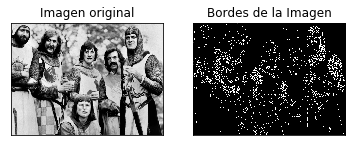

In [2]:
#tip_01_07.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('dataset/examples/Holy-Grail2.jpg', 0)
bordes = cv2.Canny(img, 180, 260)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(bordes, cmap='gray')
plt.title('Bordes de la Imagen'), plt.xticks([]), plt.yticks([])

plt.show()

**Bibliografía**
https://www.aprenderpython.net/algoritmo-de-canny/


# Detección Via Plantilla
La detección via templates es un método para buscar y encontrar la ubicación de una imagen plantilla sobre una imagen base.

OpenCV incluye la función cv2.matchTemplate() para este propósito. Simplemente desliza la imagen de la plantilla sobre la imagen de entrada (como en la convolución 2D) y compara la plantilla y parchea la imagen de entrada sobre debajo la imagen de la plantilla. Esta función devuelve una imagen en escala de grises, donde cada píxel indica cuánto coincide el entorno de ese píxel con la plantilla.
Si la imagen de entrada es de tamaño (WxH) y la imagen de la plantilla es de tamaño (wxh), la imagen de salida tendrá un tamaño de (W-w + 1, H-h + 1). Una vez que obtenga el resultado, puede usar la función cv2.minMaxLoc () para encontrar dónde está el valor máximo / mínimo. Para saber la esquina superior izquierda del rectángulo y toma (w, h) como ancho y alto del rectángulo. Ese rectángulo es tu región de plantilla.


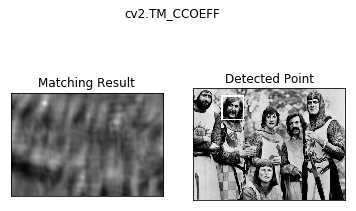

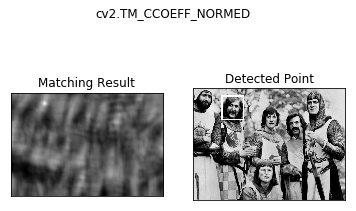

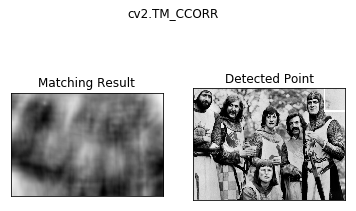

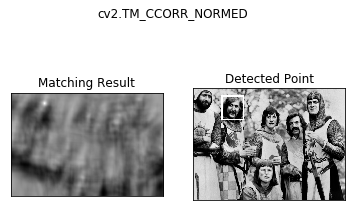

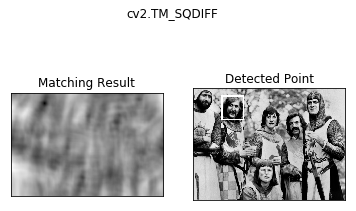

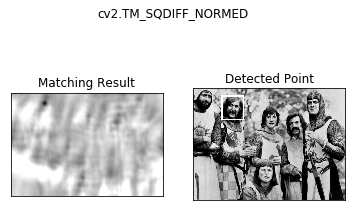

In [5]:
#tip_01_08.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('dataset/examples/Holy-Grail2.jpg', 0)
img2 = img.copy()
template = cv2.imread('dataset/examples/template.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 9)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# Meanshift
Método iterativo no paramétrico que puede ser usado para clustering, segmentación, etc.  Encuentra las modas de unas distribuciones, pero sin necesitar saber cuántas modas tenemos  Considera que el espacio de datos es una función de densidad de probabilidad muestreada  Para cada punto del conjunto de datos, encuentra la moda más cercana  Para ello, define una región alrededor de ese punto y encuentra su media, cambiando la situación de la media actual a la nueva (shift). Repite el proceso hasta que converja.

A continuación se detallan una serie de imágenes par explicar mejor este proceso:

Elegimos un punto desde el cual empezar y establecemos un radio que consideramos la ‘Región de interés’, y dentro de ese área hacemos la moda de puntos, viendo donde se sitúan la mayor densidad de puntos. En ese momento establecemos el ‘centro de la masa’. El cual será el punto referencia desde donde volveremos a iterar, para conseguir acercarnos finalmente al punto con más densidad de puntos de toda la imagen.

Dando como resultado el centro con mayor densidad de puntos.

Es un proceso a nivel teórico bastante más complejo, lo cual no entramos en más detalle teórico.

#tip







In [1]:
# tip_02_01_a.py
# coding=utf-8
import numpy as np
import cv2

cap = cv2.VideoCapture("dataset/examples-video/test.mp4")

# toma el primer fotograma del video
ret, frame = cap.read()

# Configuración de la ubicación inicial de la ventana
r, h, c, w = 300, 100, 500, 100  # simply hardcoded the values
track_window = (c, r, w, h)

# establece el ROI para rastrear
roi = frame[r:r + h, c:c + w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Configure el criterio de terminación, ya sea 10 iteración o mover por lo menos 1 pt.
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 50, 1)

while (1):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

        # Aplica meanshift para conseguir la nueva ubicación.
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Dibújalo en la imagen
        x, y, w, h = track_window
        img2 = cv2.rectangle(frame, (x, y), (x + w, y + h), 255, 2)
        cv2.imshow('img2', img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k) + ".jpg", img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

En esta práctica se setea inicialmente los valores iniciales del cuadro a detectar. Es interesante que intentéis sacar esos puntos de manera dinámica con los retos realizados anteriormente.
Bibliografía

https://rua.ua.es/dspace/bitstream/10045/17323/6/segmentacion.pdf
https://docs.opencv.org/3.4.0/db/df8/tutorial_py_meanshift.html


# Camshift

El algoritmo de Meanshift es muy interesante, pero nuestra ventana siempre tiene el mismo tamaño cuando el objeto está más lejos o está muy cerca de la cámara. Eso no es bueno. 
El escenario ideal sería poder adaptar el tamaño de la ventana con el tamaño y rotación del objetivo. La solución se llama CAMshift (Continuously Adaptive Meanshift).

Aplica el cambio de significado primero. Una vez que mediashift converge, actualiza el tamaño de la ventana como, s = 2 x \(M_00 / 256 )^1/2. También calcula la orientación de la elipse que mejor se adapte a ella. De nuevo se aplica la mediashift con la nueva ventana de búsqueda a escala y la ubicación de la ventana anterior. El proceso continúa hasta que se alcanza la precisión requerida.

https://www.youtube.com/watch?time_continue=3&v=6rcTz1IuPGw


In [2]:
# tip_02_01_b.py
# coding=utf-8
import numpy as np
import cv2

cap = cv2.VideoCapture("dataset/examples-video/test.mp4")

# toma el 1º frame del video
ret, frame = cap.read()

# ajusta el tamño de la ventana
r, h, c, w = 300, 100, 500, 100  # simply hardcoded the values
track_window = (c, r, w, h)

# ajusta el ROI para el rastreo
roi = frame[r:r + h, c:c + w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Configure el criterio de terminación, ya sea 10 iteración o mover por lo menos 1 pt.
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while (1):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

        # aplica meanshift para conseguir la nueva ubicacion
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # dibuja en la imagen
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame, [pts], True, 255, 2)
        cv2.imshow('img2', img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k) + ".jpg", img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

Continuara....